# Classification Models

In machine learning, classification models play a vital role in analyzing and categorizing data. The code snippet provided demonstrates an example of working with classification models using the MNIST dataset. The MNIST dataset consists of a collection of handwritten digits, and the goal is to classify each image into the correct digit category.

This code serves as a starting point for building and evaluating classification models. By using various algorithms and techniques, such as logistic regression, decision trees, or deep learning, one can train models to accurately classify unseen handwritten digits based on the patterns and features extracted from the input data.

Classification models have a wide range of applications, from image recognition to sentiment analysis and fraud detection. They are an essential tool for solving classification problems and enabling intelligent decision-making based on data.

In [1]:
import matplotlib.pyplot as plt  # Importing matplotlib library for data visualization
import seaborn as sns  # Importing seaborn library for enhanced visual aesthetics
import numpy as np  # Importing numpy library for numerical operations
import pandas as pd  # Importing pandas library for data manipulation

from sklearn.datasets import fetch_openml  # Importing fetch_openml function from scikit-learn's datasets module

In [2]:
mnist = fetch_openml("mnist_784", version=1, parser="auto") # Loading the MNIST dataset

In [3]:
mnist.keys() # Displaying the keys of the mnist dictionary

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
x, y = mnist["data"].values, mnist["target"].values # Extracting the input data and target labels from the mnist dictionary
y = y.astype(float) # Converting the target labels to float type using numpy's astype function

In [5]:
x  # Displaying the input data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

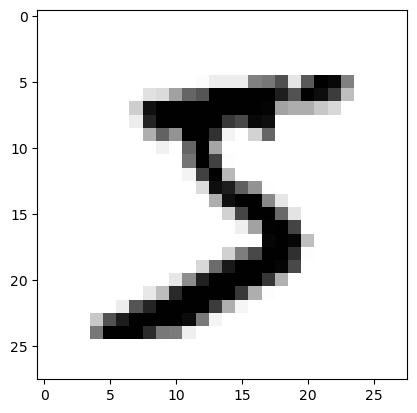

In [6]:
plt.imshow(x[0].reshape(28, 28), cmap="binary") # Plotting the first image from the dataset using imshow function from matplotlib

### Binary Classification

In [7]:
from sklearn.model_selection import train_test_split # Importing the necessary module for splitting the data into training and testing sets

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3) # Splitting the dataset into training and testing sets with a test size of 30%

In [9]:
y_train_5 = (y_train == 5) # Creating a binary target for the digit 5 in the training set

In [10]:
from sklearn.linear_model import SGDClassifier # Importing the SGDClassifier from scikit-learn, which is a linear classifier suitable for binary classification tasks

sgd_clf = SGDClassifier() # Creating an instance of the SGDClassifier
sgd_clf.fit(x_train, y_train_5) # Training the SGDClassifier on the training data and the binary target for the digit 5

SGDClassifier()

Real Class:  False
Predicted Class by the Model:  [False]


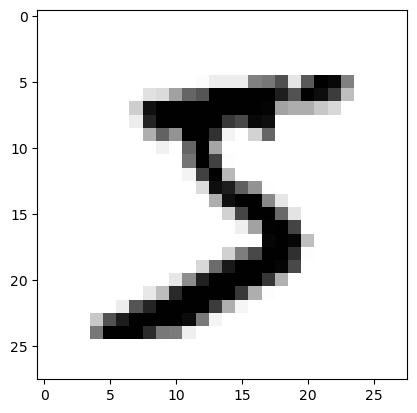

In [11]:
n = 2 # Selecting the index of the image to display
plt.imshow(x[0].reshape(28, 28), cmap="binary") # Displaying the image at index 0 (the first image) in the dataset using Matplotlib

print("Real Class: ", y_train_5[n]) # Printing the real class label for the selected image in the training set
print("Predicted Class by the Model: ", sgd_clf.predict([x_train[n]])) # Making predictions for the selected image using the trained model and printing the predicted class

### How to estimate the accuracy of a model

In [12]:
# Importing the necessary module for cross-validation
from sklearn.model_selection import cross_val_score 

# Performing cross-validation on the SGD classifier (sgd_clf) using the training data (x_train) and binary target (y_train_5)
# The 'cv' parameter specifies the number of folds in cross-validation (in this case, 3-fold cross-validation is used)
# The 'scoring' parameter specifies the evaluation metric to be used (in this case, accuracy is used)
cross_val_score(sgd_clf, x_train, y_train_5, cv=3, scoring="accuracy")

array([0.96394025, 0.96644829, 0.96375436])

### The Confusion Matrix

In [13]:
# Importing the necessary modules for computing the confusion matrix, precision, and recall
from sklearn.metrics import confusion_matrix

In [14]:
# Computing the confusion matrix for the binary classification problem
# The true labels (y_train_5) and predicted labels (sgd_clf.predict(x_train)) are passed as arguments
confusion_matrix(y_train_5, sgd_clf.predict(x_train))

array([[44491,   103],
       [ 2000,  2406]], dtype=int64)

In [15]:
# Importing the modules for computing precision and recall scores
from sklearn.metrics import precision_score, recall_score

# Predicting the labels for the training data (x_train) using the trained SGD classifier (sgd_clf)
y_train_pred = sgd_clf.predict(x_train)

# Printing the precision and recall scores
print("Precision: ", precision_score(y_train_5, y_train_pred))
print("Recall: ", recall_score(y_train_5, y_train_pred))

Precision:  0.958947787963332
Recall:  0.5460735360871539


In [16]:
# Importing the module for computing the classification report
from sklearn.metrics import classification_report

# Printing the confusion matrix
print(confusion_matrix(y_train_5, sgd_clf.predict(x_train)))

# Generating the classification report
# The true labels (y_train_5) and predicted labels (y_train_pred) are passed as arguments
# The classification report includes precision, recall, F1-score, and support for each class
print(classification_report(y_train_5, y_train_pred))

[[44491   103]
 [ 2000  2406]]
              precision    recall  f1-score   support

       False       0.96      1.00      0.98     44594
        True       0.96      0.55      0.70      4406

    accuracy                           0.96     49000
   macro avg       0.96      0.77      0.84     49000
weighted avg       0.96      0.96      0.95     49000



### Multiclass Classification

In [17]:
# Fit the SGDClassifier model to the training data and corresponding target labels.
sgd_clf.fit(x_train, y_train)

SGDClassifier()

In [18]:
# Import necessary libraries for cross-validation and prediction.
from sklearn.model_selection import cross_val_predict

# Use cross_val_predict to obtain the predicted target labels using cross-validation.
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train, cv=3)

In [19]:
# Import the confusion_matrix function from scikit-learn metrics module.
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix using the true target labels (y_train) and the predicted labels (y_train_pred).
conf_mx = confusion_matrix(y_train, y_train_pred)

# Print the confusion matrix and the classification report.
print(conf_mx)
print(classification_report(y_train, y_train_pred))

[[4478    1   43   28    9   31   70    6   62   33]
 [   2 5316   57    9   10   14   13    5   75   16]
 [  28   53 4223  130   69   11  113   57  122   47]
 [  26   26  165 4478   17  126   33   30   84  116]
 [   9   21   47   13 4204    8   60   11   42  352]
 [  86   24   56  230  107 3423  187   16  150  127]
 [  28   17   38    6   26   48 4620    5   39    5]
 [  29   23   79   44   63   16    4 4400   23  374]
 [  37   97  126  210   57  180   78   16 3555  444]
 [  18   27   20   89  374   34    2  156   46 4142]]
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94      4761
         1.0       0.95      0.96      0.96      5517
         2.0       0.87      0.87      0.87      4853
         3.0       0.86      0.88      0.87      5101
         4.0       0.85      0.88      0.87      4767
         5.0       0.88      0.78      0.83      4406
         6.0       0.89      0.96      0.92      4832
         7.0       0.94      0.87   

<Axes: >

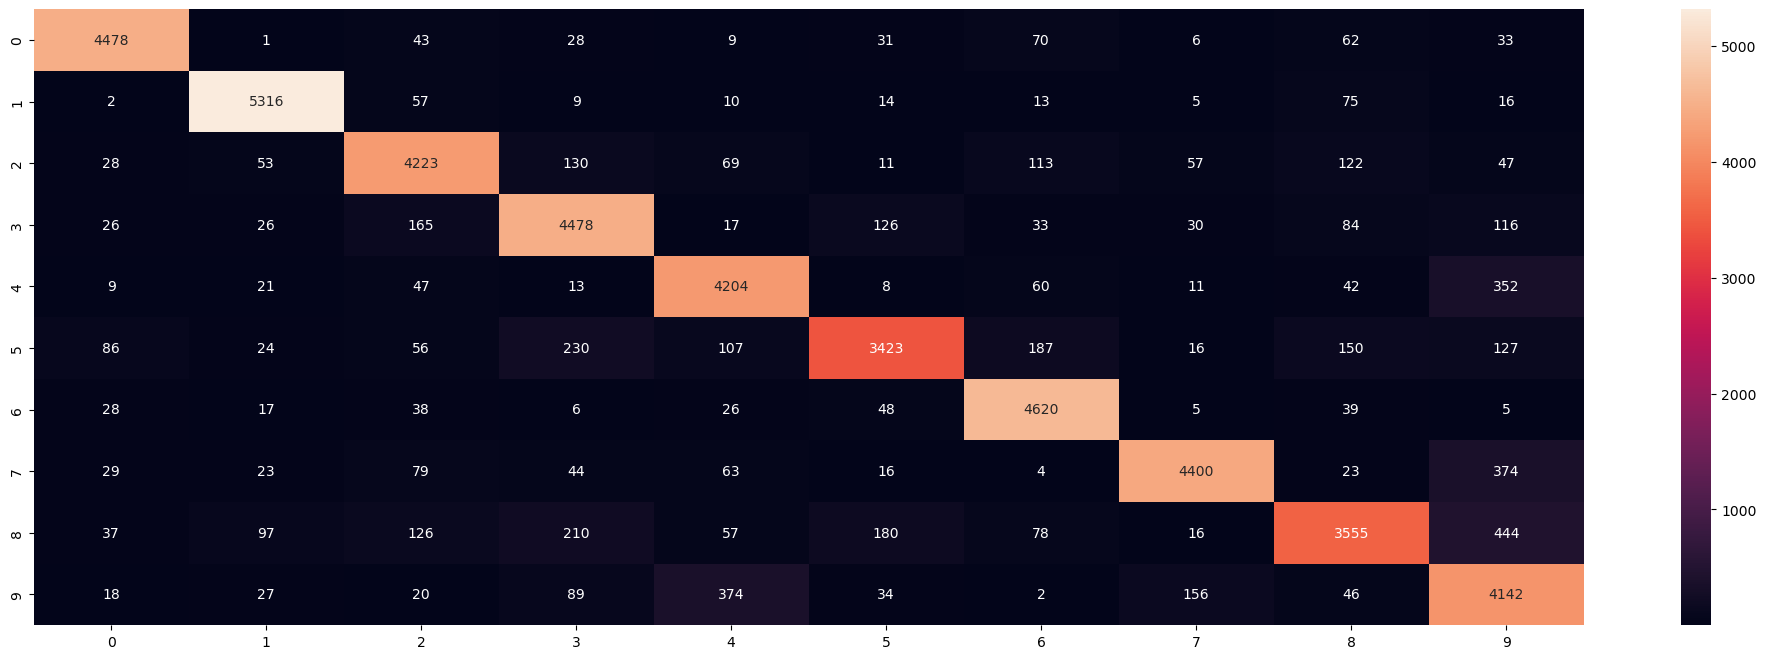

In [20]:
# Create a heatmap to visualize the confusion matrix.
fig, ax = plt.subplots(figsize=(25, 8))
sns.heatmap(conf_mx, annot=True, fmt=".0f")

<Axes: >

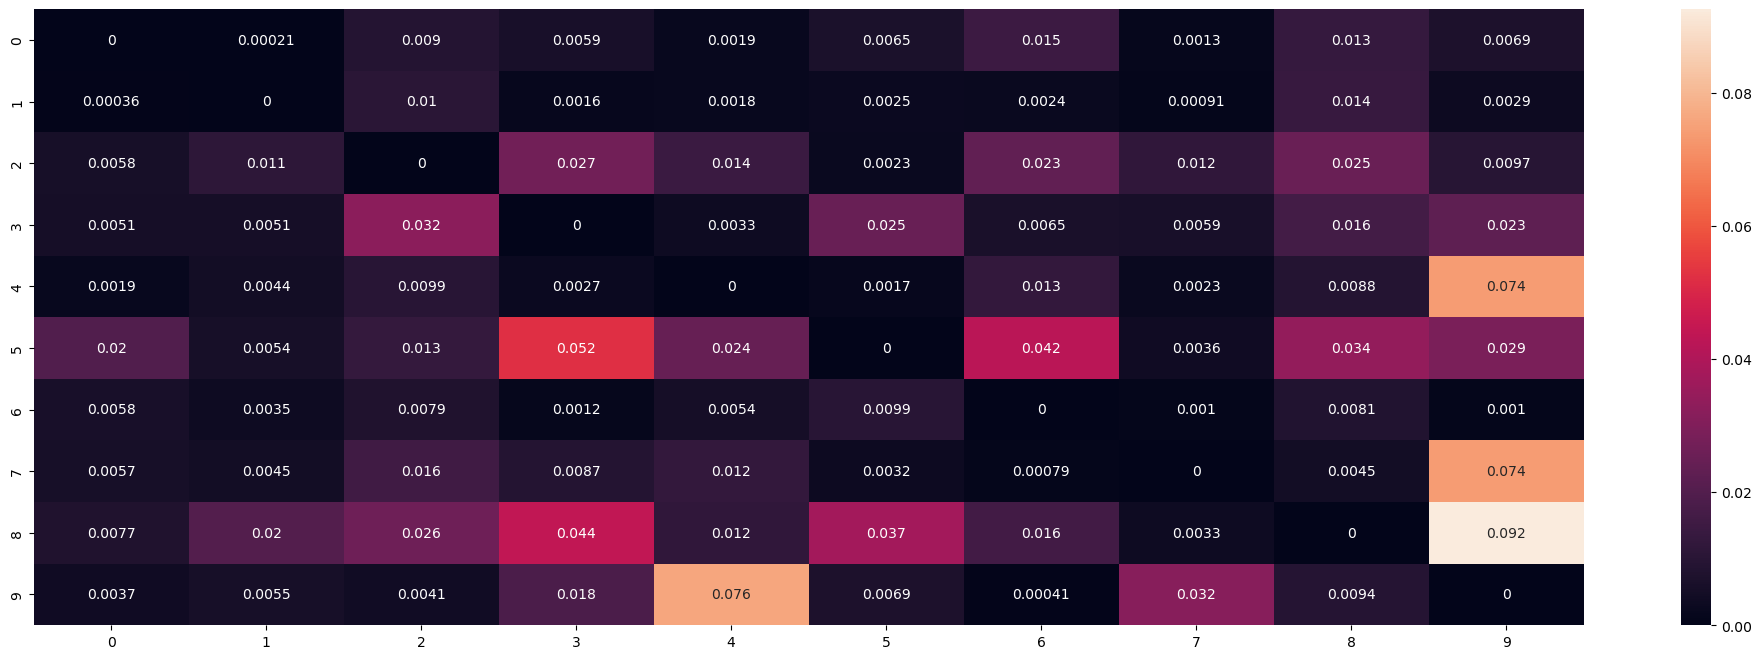

In [21]:
# Compute the normalized confusion matrix to observe relative errors.
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx /row_sums

# Fill the diagonal of the normalized confusion matrix with zeros to focus on the errors.
np.fill_diagonal(norm_conf_mx, 0)

# Create a heatmap to visualize the normalized confusion matrix.
fig, ax = plt.subplots(figsize=(25, 8))
sns.heatmap(norm_conf_mx, annot=True)